In [1]:
!pip install nltk

In [2]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\raula\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
def detect_emotion(text, return_probabilities=False, check_bad_words=False):
    if text is None or text.strip() == "":
        return None
    
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    
    emotions = {
        'Happy': 0,
        'Sad': 0,
        'Neutral': 0
    }
    
    bad_words = ['bad', 'terrible', 'awful']  # Add more bad words as needed
    
    for sentence in sentences:
        sentiment_scores = analyzer.polarity_scores(sentence)
        compound_score = sentiment_scores['compound']
        
        if compound_score >= 0.1:
            emotions['Happy'] += 1
        elif compound_score <= -0.1:
            emotions['Sad'] += 1
        else:
            emotions['Neutral'] += 1
        
        if check_bad_words:
            for word in bad_words:
                if word in sentence.lower():
                    print("Warning: Bad word detected!")
    
    total_sentences = len(sentences)
    
    if return_probabilities:
        probabilities = {emotion: count / total_sentences for emotion, count in emotions.items()}
        return probabilities
    
    dominant_emotion = max(emotions, key=emotions.get)
    return dominant_emotion

def plot_emotion_probabilities(emotion_probabilities):
    emotions = list(emotion_probabilities.keys())
    probabilities = list(emotion_probabilities.values())

    plt.bar(emotions, probabilities)
    plt.xlabel('Emotion')
    plt.ylabel('Probability')
    plt.title('Emotion Probabilities')
    plt.show()

Emotion Probabilities:
Happy: 0.3333333333333333
Sad: 0.6666666666666666
Neutral: 0.0


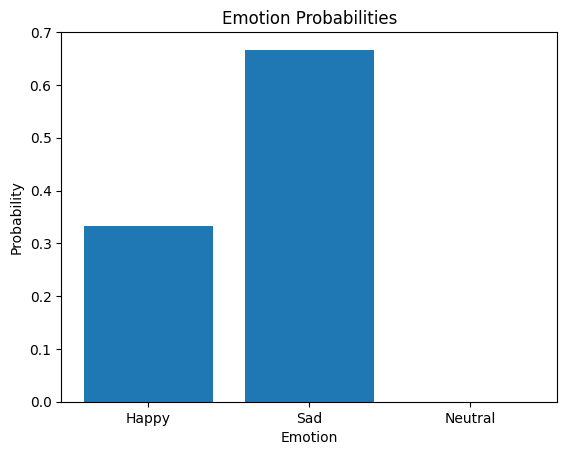

In [4]:
# Example usage
text_data = "I'm feeling excited and happy! This day couldn't get any better. However, the movie was terrible."
emotion_probabilities = detect_emotion(text_data, return_probabilities=True, check_bad_words=True)
print("Emotion Probabilities:")
for emotion, probability in emotion_probabilities.items():
    print(f"{emotion}: {probability}")

plot_emotion_probabilities(emotion_probabilities)